# U.S. Medical Insurance Costs Project

Welcome to my U.S. Medical Insurance Costs Project Jupyter Notebook! In this project, I will be analyzing a dataset related to medical insurance costs in the United States using various data analysis techniques. My aim is to uncover patterns and relationships within the data, investigating factors that might influence medical insurance charges. I'll be utilizing Python and various libraries such as NumPy, pandas, Matplotlib, Seaborn, and scikit-learn to perform data manipulation, visualization, and statistical analysis to gain insights into the dynamics of medical insurance costs and provide valuable information for further analysis and decision-making.

## Project Overview

This notebook is organized into several sections:

1. **Installing Packages:** I'll start by installing the necessary packages using pip to ensure that all the required libraries are available.

2. **Importing Libraries:** Next, I'll import essential Python libraries for data analysis and visualization.

3. **Read Data:** I'll read the insurance dataset from a CSV file and explore its initial structure.

4. **Data Preprocessing:** I'll then convert categorical variables into appropriate data types and check for missing values.

5. **Exploratory Data Analysis (EDA):** I'll analyze the dataset's summary statistics and visualize data distributions and relationships between variables.

6. **Outlier Detection:** I'll identify potential outliers in specific numerical features using box plots and the interquartile range (IQR).

7. **Exploring Relationships between Variables:** I'll utilize pair plots to visualize relationships between different numerical features.

8. **Hypothesis Testing:** I'll conduct statistical hypothesis tests to examine relationships between variables.

Let's dive into the code and start exploring the dataset!

---

## Installing Packages

In [1]:
#!{sys.executable} -m pip install scikit-learn

 ## Importing Libraries

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

## Read Data

In [3]:
# reading CSV data to dataframe 'insurance' using pandas
insurance = pd.read_csv('dataset/insurance.csv')

# inspecting first 10 lines of dataframe 'insurance' using head()
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
# determine 'insurance' data dimensions: get row and column count using shape()
insurance.shape

(1338, 7)

**Summary:** The dataframe consists of 1338 rows and 7 columns.

In [5]:
# view data type and non-null entry count using info()
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Summary:** Categorical variables (sex, smoker, region) are coded as object/string. Need to convert them for furhter analysis.

In [6]:
# convert 'sex' to boolean
insurance['sex'] = insurance['sex'].astype('category')
insurance['smoker'] = insurance['smoker'].astype('category')
insurance['region'] = insurance['region'].astype('category')
insurance['children'] = insurance['children'].astype('category')

In [7]:
# view data type and non-null entry count again after converting variables
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   category
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 37.3 KB


## Check for Missing Variables

In [8]:
# check missing values in dataframe using isnull()
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Summary:** The dataframe does not include any missing values.

## Exploratory Data Analysis

### Summary Statistics

In [9]:
# generates descriptive statistics
insurance.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


### Data Visualization

In [10]:
# add grid to plot
sns.set(style="whitegrid")

#### Data Distribution

In [11]:
# create a list of all column names in dataframe
column_names = list(insurance.columns)

##### Numerica Variables

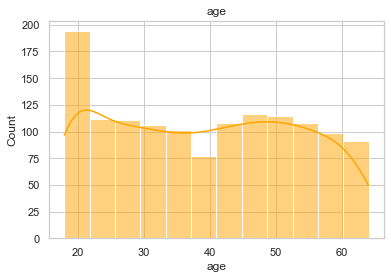

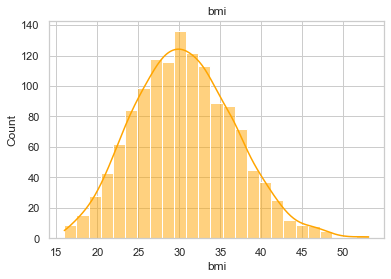

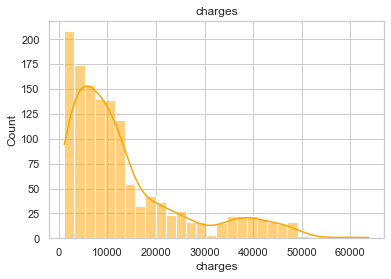

In [12]:
# Visualize the distribution of numeric variables:
# Iterate through column names and create histograms 
for variable in column_names:
    if (insurance[variable].dtypes == 'int64') or (insurance[variable].dtypes == 'float'):
        
        # using sns.histplot from the seaborn
        # kde is adding a kernel density estimate to smooth the histogram
        sns.histplot(insurance[variable], color= 'orange', kde=True)
        plt.title(variable)
        plt.show()

**Summary:**<br>
*1) Age:* While most age groups appear to be represented almost equally within the dataset (N ranging between 75-125), the age group aroung 20 appears to be over represented. Given this sampling bias, our results may not be generalizable to the general population.<br>
*2) BMI:* BMI appears to follow a normal distribution.<br>
*3) Charges:* Chargers appear right skewed, suggesting that more charges are smaller in value.

##### Categorical Variables

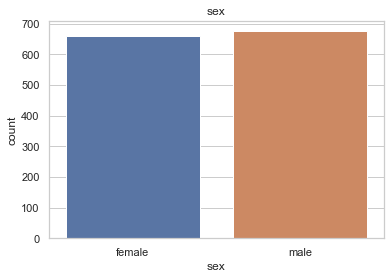

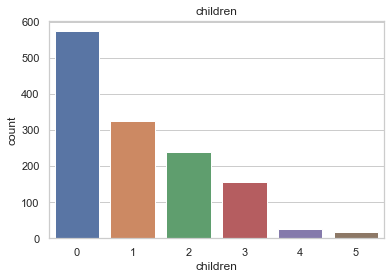

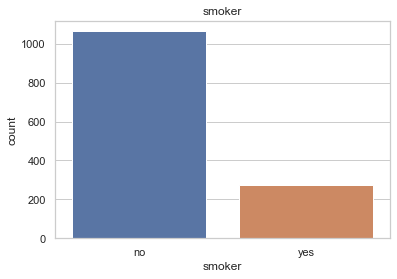

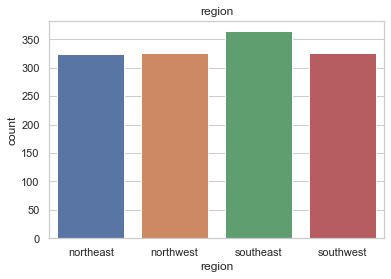

In [13]:
# Visualize the distribution of non-numeric variables:
# Iterate through column names and create count plots 
for variable in column_names:
    if (insurance[variable].dtypes != 'int64') & (insurance[variable].dtypes != 'float'):
        sns.countplot(data=insurance, x=variable)
        plt.title(variable)
        plt.show()
        
    # Optional: Print out variables that are floats or integers
    # elif insurance[variable].dtypes == 'float':
    #    print(variable, ' is a float')
    #else: 
    #    print(variable, ' is an integer')

**Summary:**<br> 
*1) Sex:* Both genders (male/female) are equally represented within the dataset.<br>
*2) Children:* The majority (between 550-600) respondents within the dataset have no children. The number of respondents who have a certain number of children decreases with the number of children. <br>
*3) Smoker:* The majority (about 1000) of the respondents within the dataset does not smoke. Only a minority does (about 220).<br>
*4) Region:* While northeast, southeast, and southwest are relatively similar in size, the majority of respondents comes from the southeast region<br>

##### Skewness Levels of Numeric Variables

In [14]:
# calculate feature skewness values for 'bmi', 'age', and 'charges'
# output as data frame
Skew = pd.DataFrame({'skewness' : [stats.skew(insurance.bmi), stats.skew(insurance.age),stats.skew(insurance.charges)]},
                    index=['bmi','age','charges'])
Skew

,skewness
bmi,0.283729
age,0.055610
charges,1.514180


##### Charges by [Categorical Variables]

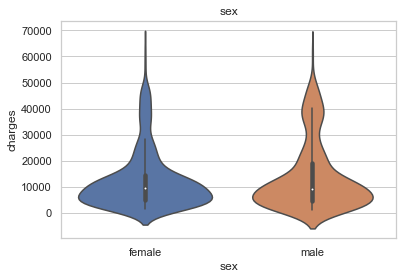

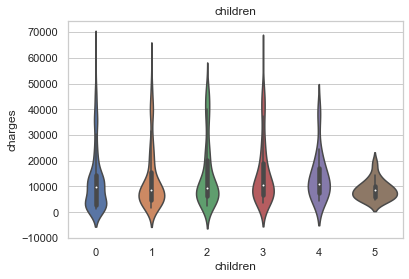

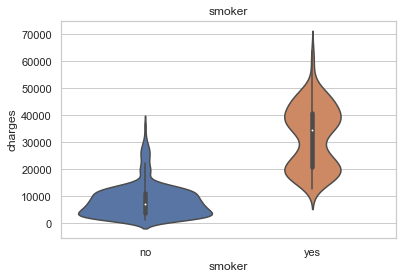

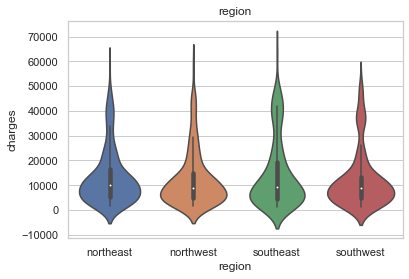

In [15]:
# remove 'charges' from list of column names, we will plot the others against it
column_names_wo_charges = [item for item in column_names if item != 'charges']


# Compare distribution of charges across different categories for non-numeric variables
# Iterate through column names and create violin plots 
for variable in column_names:
    if (insurance[variable].dtypes != 'int64') & (insurance[variable].dtypes != 'float'):
        sns.violinplot(y='charges', x=variable, data=insurance, split=True)
        plt.title(variable)
        plt.show()
        
    # Optional: Print out variables that are floats or integers
    # elif insurance[variable].dtypes == 'float':
    #    print(variable, ' is a float')
    #else: 
    #    print(variable, ' is an integer')

**Summary:**<br>
*1) Sex:* A lower number of men have small charges (between 0 - 10.000), but a higher number have higher charges (around 4.000) in comparison to women.<br> 
*2) Children:* Many respondents who have 5 children have rather low charges (0 - 20.000), and comparatively little high charges.<br>
*3) Smokers:* A larger amount of smokers appear to have higher charges.<br>
*4) Region:* A relatively smaller number of respondents from southeast have lower charges, and instead a larger number of respondents from southeast have higher charges.

#### Outlier Detection

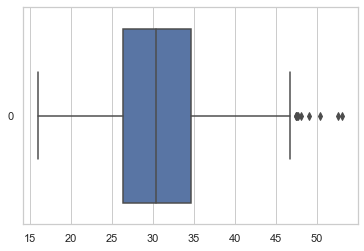

Based on the IQR-method, bmi contains 9 outliers


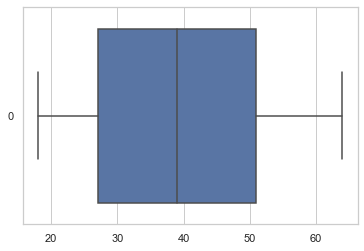

Based on the IQR-method, age contains 0 outliers


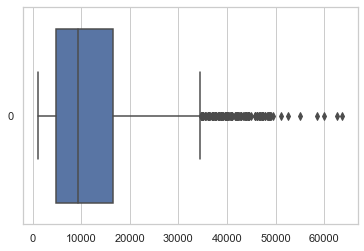

Based on the IQR-method, charges contains 139 outliers


In [16]:
# Iterate through list of bmi, age, charges and create box plots and IQR for each to assess outliers
for variable in ['bmi', 'age', 'charges']:
    # create a horizontal box plot of 'bmi' to identify potential outliers
    sns.boxplot(insurance[variable], orient = 'h')
    plt.show()
    
    # compute the interquartile range (IQR) for the 'bmi' feature using quartile percentiles
    Q1 = np.percentile(insurance[variable], 25)
    Q3 = np.percentile(insurance[variable], 75)
    IQR = Q3 - Q1
    
    # detect and count outliers in the feature using the IQR
    outlier_bmi = [x for x in insurance[variable] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
    print('Based on the IQR-method,', variable, 'contains', len(outlier_bmi), 'outliers')

## Exploring Relationships between Variables

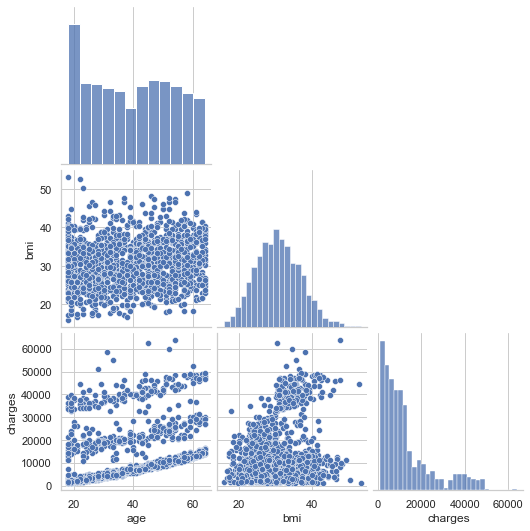

In [17]:
# plotting pair plot for dataframe
sns.pairplot(insurance,  diag_kind='hist', corner=True)  # diagonal plots display histograms
plt.show()

**Summary:**<br>
*1) bmi x age:* slight upward trajectory - BMI increases with increasing age slightly.<br>
*2) charges x age:* strong upward trajectory (in groups) - Charges increase with increasing age. This applies to the different tiers that appear to exist in terms of charges.<br>
*3) charges x bmi:* Potentially strong upward trajectoy - Charges increase with increasing bmi.

## Hypothesis Testing

#### H1: Do charges of people who smoke differ significantly from the people who don't?

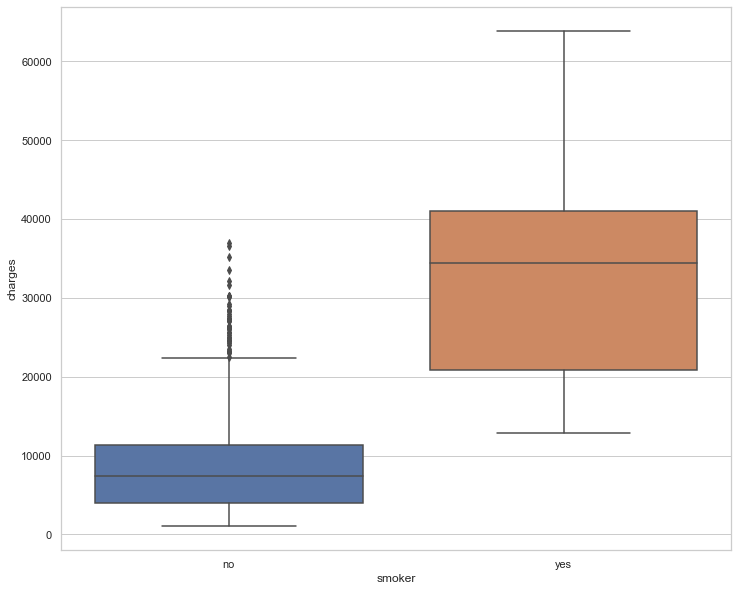

In [18]:
# plotting swarm plot to make comparison over distribution of 'smoker' with respect to 'charges' and 'age'
plt.figure(figsize=(12, 10))
sns.boxplot(y='charges', x='smoker', data=insurance)
plt.show()

In [19]:
# applying T-test to analyse the effect of smoking on the charges
H1o = "Charges of smoker and non-smoker are same"   
H1a = "Charges of smoker and non-smoker are not the same"

x = np.array(insurance[insurance.smoker == 'yes'].charges) 
y = np.array(insurance[insurance.smoker == 'no'].charges)

# performing an independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)

print(p_value)

8.271435842177219e-283


**Summary:** <br>
*Statistical wording:* Given a significance threshold of .05, we have to reject the Null hypothesis "Charges of smoker and non-smoker are same" given the p-value resulting from our independent t-Test is smaller than 0.05. <br> 
*Put simply:* Smokers pay significantly higher charges than non-smokers

#### H2: Do men have a significantly higher bmi than women?

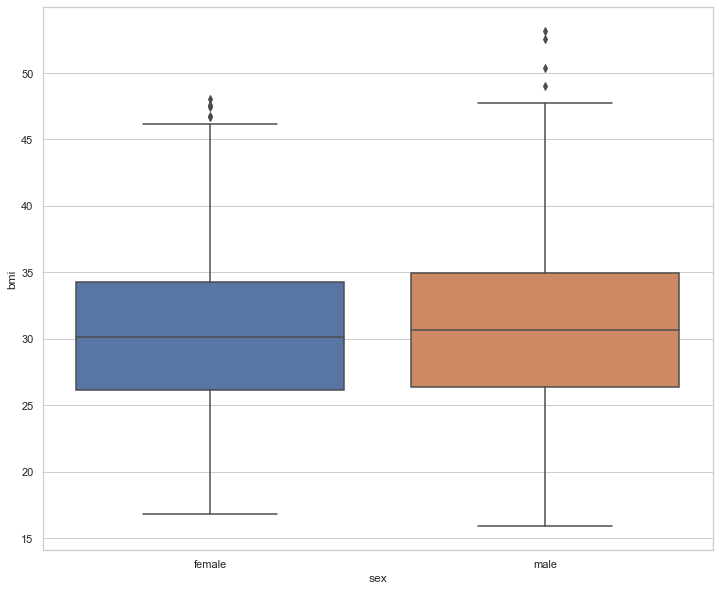

In [20]:
# plotting swarm plot to make comparison over distribution of 'sex' with respect to 'bmi' and 'age'
plt.figure(figsize=(12,10))
sns.boxplot(y='bmi', x='sex', data=insurance)
plt.show()

In [21]:
#applying T-test to analyse the effect of gender on the bmi
H2o = "bmi of males does not differ significantly from females"   
H2a = "bmi of males differ significantly from females"   

x = np.array(insurance[insurance.sex == 'male'].bmi)  
y = np.array(insurance[insurance.sex == 'female'].bmi) 

# performing an independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)  

print(p_value)

0.08997637178984934


**Summary:** <br>
*Statistical wording:* Given a significance threshold of .05, we cannot reject the Null hypothesis "bmi of males does not differ significantly from females" given the p-value resulting from our independent t-Test is larger than 0.05. <br> 
*Put simply:* Difference in BMI are not systematically rooted in a person's gender.

#### H3: Do men smoke significantly more than women?

In [22]:
Ho = "Gender has no effect on smoking habits" 
Ha = "Gender has an effect on smoking habits"   

# creating a crosstab between gender and smokers
crosstab = pd.crosstab(insurance['sex'],insurance['smoker'])
print(crosstab)

smoker   no  yes
sex             
female  547  115
male    517  159


In [23]:
# applying Chi_square test
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
print(p_value)

0.006548143503580696


**Summary:** <br>
*Statistical wording:* Given a significance threshold of .05, we can reject the Null hypothesis "Gender has no effect on smoking habits" given the p-value resulting from our independent t-Test is smaller than 0.05. <br> 
*Put simply:* Men are more likely to smoke than women.

#### H4: Does the number of childre impact the bmi of women?

In [24]:
Ho = "No. of children has no effect on bmi"   
Ha = "No. of children has an effect on bmi"   

# copy females data to another dataframe
fem = insurance[insurance['sex'] == 'female'].copy()

# create three arrays for each level of children
zero = fem[fem.children == 0]['bmi']
one = fem[fem.children == 1]['bmi']
two = fem[fem.children == 2]['bmi']

# applying Anova Test (comparing means between the three groups)
f_stat, p_value = stats.f_oneway(zero,one,two)
print(p_value)

0.7158579926754841


**Summary:** <br>
*Statistical wording:* Given a significance threshold of .05, we cannot reject the Null hypothesis "No. of children has no effect on bmi" given the p-value resulting from our independent t-Test is larger than 0.05. <br> 
*Put simply:* The number of children does not impact a women's bmi.